## Boolean Functions

## AND Function

| Input 1 | Input 2 | Output |
| ------- | ------- | ------ |
| 0       | 0       | 0      |
| 0       | 1       | 0      |
| 1       | 0       | 0      |
| 1       | 1       | 1      |

## OR Function

| Input 1 | Input 2 | Output |
| ------- | ------- | ------ |
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 1      |


## XOR Function

| Input 1 | Input 2 | Output |
| ------- | ------- | ------ |
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |



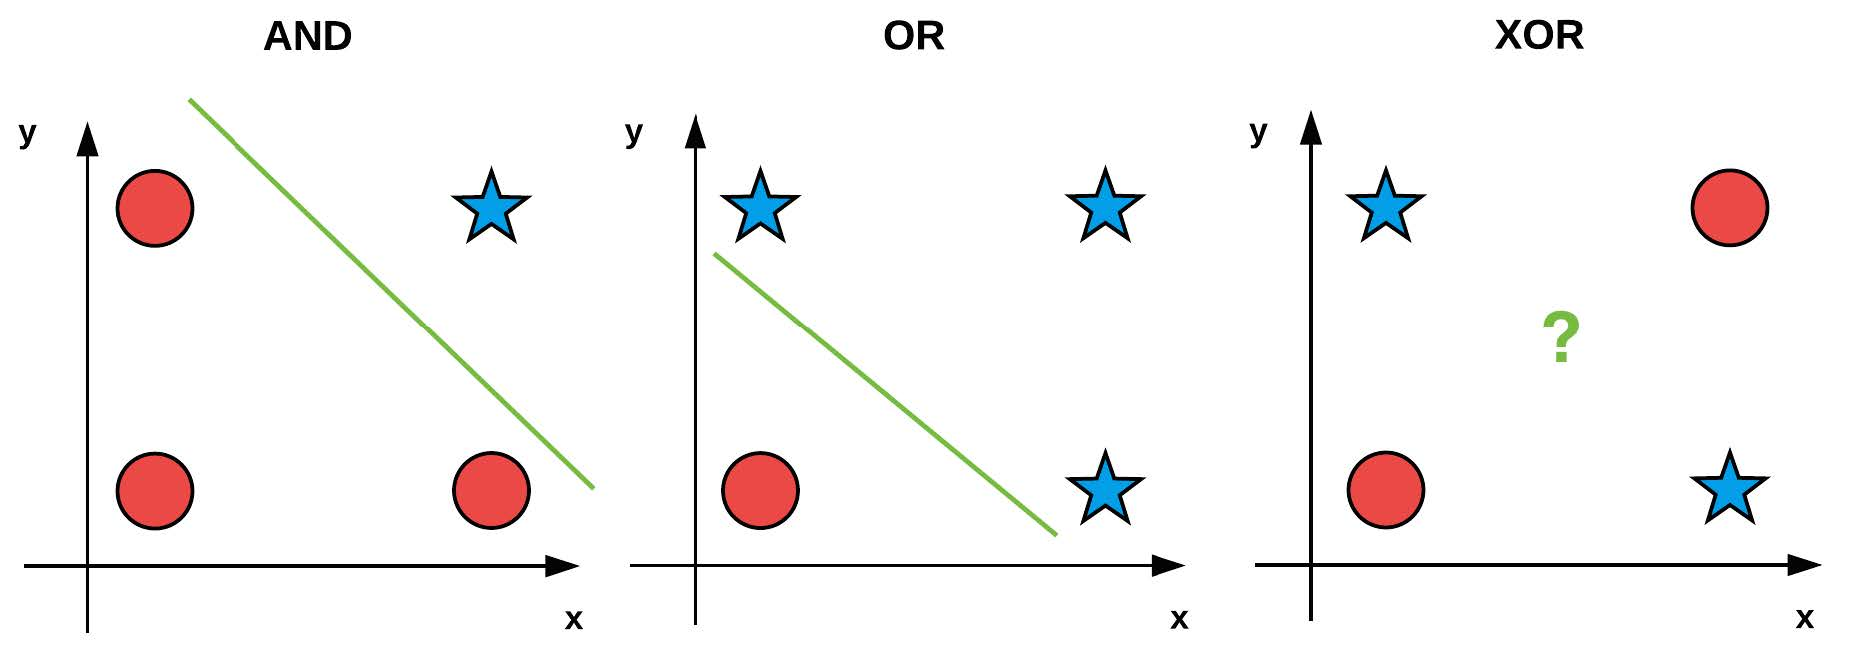

Dataset Examples

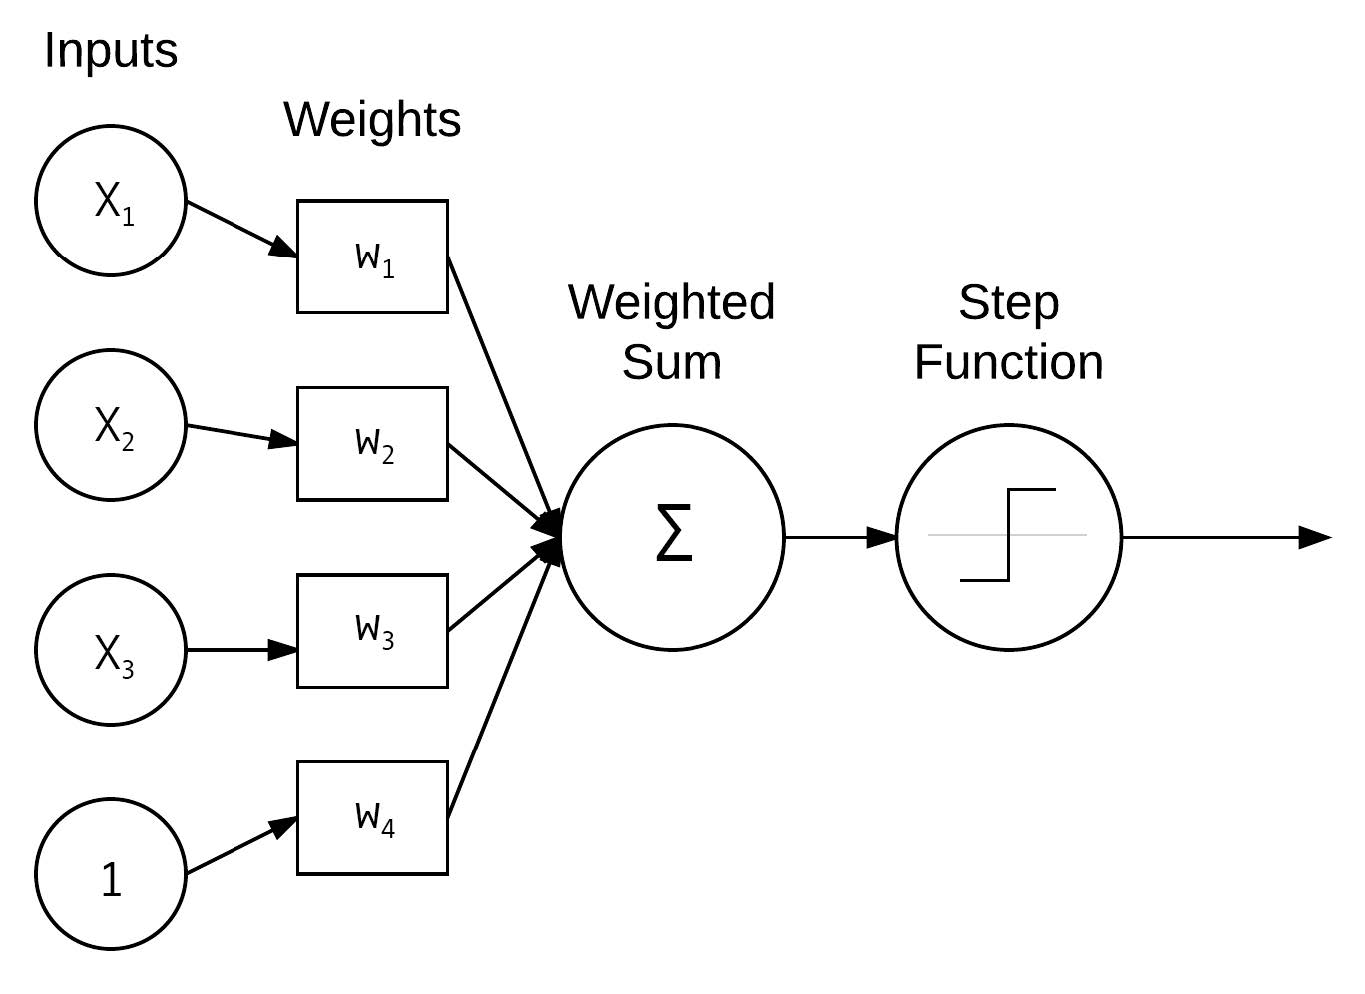

Perceptron

****

**Perceptron Class Implementation** \\


In [3]:
import numpy as np

class Perceptron:
	def __init__(self, N, alpha=0.1):
		# Initialize weights and store learning rate
		self.W = np.random.randn(N + 1) / np.sqrt(N)
		self.alpha = alpha

	#Definition step function
	def step(self, x):
		# Apply step function
		# A is greater than B, return 1;
		return 1 if x > 0 else 0

	def fit(self, X, y, epochs=10):
		# Add bias column to feature matrix
		X = np.c_[X, np.ones((X.shape[0]))]

		# Train for a number of epochs
		for epoch in np.arange(0, epochs):
			for (x, target) in zip(X, y):
				p = self.step(np.dot(x, self.W))
				# Weight update if prediction is incorrect
				if p != target:
					error = p - target
					self.W += -self.alpha * error * x

	def predict(self, X, addBias=True):
		# Ensure input is matrix
		X = np.atleast_2d(X)

		# Optionally add bias column
		if addBias:
			X = np.c_[X, np.ones((X.shape[0]))]

		# Get prediction using step function
		return self.step(np.dot(X, self.W))


OR Dataset

In [4]:
# Construct the OR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# Train the perceptron
print("Feature_num:",X.shape[1])
print("[INFO] training perceptron...")

#Call the Perceptron class and assign it to p
p = Perceptron(X.shape[1], alpha=0.1)

#Call the fit function of the Perceptron class.
p.fit(X, y, epochs=20)

# Evaluate the trained perceptron
print("[INFO] testing perceptron...")

# Loop over data points to test predictions
for (x, target) in zip(X, y):
	pred = p.predict(x)
	print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

# we calculate the test accuracy here. 100%

Feature_num: 2
[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=1
[INFO] data=[1 1], ground-truth=1, pred=1


AND Dataset

In [5]:
# Construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Train the perceptron
print("Feature_num:",X.shape[1])
print("[INFO] training perceptron...")

#Call the Perceptron class and assign it to p
p = Perceptron(X.shape[1], alpha=0.1)

#Call the fit function of the Perceptron class.
p.fit(X, y, epochs=20)

# Evaluate the trained perceptron
print("[INFO] testing perceptron...")

# Test predictions for each data point
for (x, target) in zip(X, y):
	pred = p.predict(x)
	print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

# we calculate the test accuracy here. 100%

Feature_num: 2
[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=0, pred=0
[INFO] data=[1 0], ground-truth=0, pred=0
[INFO] data=[1 1], ground-truth=1, pred=1


XOR Dataset

In [6]:
# Construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train the perceptron
# The procedure here is the same as above
print("Feature_num:",X.shape[1])
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=200)


# Evaluate the trained perceptron
print("[INFO] testing perceptron...")

# Test predictions for each data point
for (x, target) in zip(X, y):
	pred = p.predict(x)
	print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

#From the test results here, it can be seen that for the XOR dataset, 3 out of 4 results were incorrect, so XOR cannot be separated using a perceptron.
# Therefore, next we will use a neural network for training and testing.

Feature_num: 2
[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=1
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=0
[INFO] data=[1 1], ground-truth=0, pred=0


In [7]:
# First, we define a NeuralNetwork class.

class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        # Initialize weights, network architecture, and learning rate
        self.W = []
        self.layers = layers
        self.alpha = alpha

        # Initialize weights for all but the last two layers
        for i in np.arange(0, len(layers) - 2):
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))

        # Handle weight initialization for the last two layers
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))

    def __repr__(self):
        # Return string representation of the network architecture
        return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))

    def sigmoid(self, x):
        # Sigmoid activation function
        return 1.0 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # Derivative of the sigmoid function
        return x * (1 - x)

    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # Add bias column to the input dataset
        X = np.c_[X, np.ones((X.shape[0]))]

        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)

            # Display training update if necessary
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                print("[INFO] epoch={}, loss={:.7f}".format(epoch + 1, self.calculate_loss(X, y)))

    def fit_partial(self, x, y):
        # Forward pass
        A = [np.atleast_2d(x)]
        for layer in np.arange(0, len(self.W)):
            net = A[layer].dot(self.W[layer])
            out = self.sigmoid(net)
            A.append(out)

        # Backpropagation
        error = A[-1] - y
        D = [error * self.sigmoid_deriv(A[-1])]
        for layer in np.arange(len(A) - 2, 0, -1):
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)
        D = D[::-1]

        # Update weights
        for layer in np.arange(0, len(self.W)):
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self, X, addBias=True):
        # Initialize the input for forward propagation
        p = np.atleast_2d(X)

        # Add bias if necessary
        if addBias:
            p = np.c_[p, np.ones((p.shape[0]))]

        # Forward propagation
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))

        return p

    def calculate_loss(self, X, targets):
        # Compute the loss between the prediction and true values
        predictions = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        return loss


In [8]:
# We define a three-layer NeuralNetwork and print the number of neurons in each layer.
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
print(nn)

NeuralNetwork: 2-2-1


In [10]:

# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# define our 2-2-1 neural network and train it
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
nn.fit(X, y, epochs=20000)

# loop over the XOR data points and make a prediction on the data point then display the result
for (x, target) in zip(X, y):
	pred = nn.predict(x)[0][0]
	step = 1 if pred > 0.5 else 0
	print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
		x, target[0], pred, step))

# We can see that the loss value decreases, but as the number of epochs increases, the loss decreases more slowly,
# indicating that the model training has already converged.

[INFO] epoch=1, loss=0.5846676
[INFO] epoch=100, loss=0.4995402
[INFO] epoch=200, loss=0.4981365
[INFO] epoch=300, loss=0.4954247
[INFO] epoch=400, loss=0.4876166
[INFO] epoch=500, loss=0.4643038
[INFO] epoch=600, loss=0.4038909
[INFO] epoch=700, loss=0.2836819
[INFO] epoch=800, loss=0.1293308
[INFO] epoch=900, loss=0.0578624
[INFO] epoch=1000, loss=0.0325789
[INFO] epoch=1100, loss=0.0215154
[INFO] epoch=1200, loss=0.0156655
[INFO] epoch=1300, loss=0.0121479
[INFO] epoch=1400, loss=0.0098368
[INFO] epoch=1500, loss=0.0082184
[INFO] epoch=1600, loss=0.0070297
[INFO] epoch=1700, loss=0.0061239
[INFO] epoch=1800, loss=0.0054132
[INFO] epoch=1900, loss=0.0048422
[INFO] epoch=2000, loss=0.0043744
[INFO] epoch=2100, loss=0.0039847
[INFO] epoch=2200, loss=0.0036556
[INFO] epoch=2300, loss=0.0033741
[INFO] epoch=2400, loss=0.0031310
[INFO] epoch=2500, loss=0.0029190
[INFO] epoch=2600, loss=0.0027326
[INFO] epoch=2700, loss=0.0025676
[INFO] epoch=2800, loss=0.0024205
[INFO] epoch=2900, loss=0.

In [11]:
# Here is an example to create a NN with 10 layers

layers = [2, 8, 8, 4, 1]
# The first layer (input layer) has 2 neurons. This matches the input size for the XOR problem
# where we have two binary values as input (like [0,1] or [1,0]).
# Next two entries: The second and third layers are hidden layers, each having 8 neurons.
# The number of neurons in hidden layers doesn't necessarily match the size of the input or output data.
# The fourth layer is also a hidden layer, and has 4 neurons.
# The number of layers and neurons in hidden layers are arbitrary and can be changed based on your design choices and the problem's requirements.
# The last layer (output layer) has 1 neuron, which matches the output size for the XOR problem.
# The XOR output for any given input pair is a single binary value (either 0 or 1).

nn2 = NeuralNetwork(layers)
print(nn2)

NeuralNetwork: 2-8-8-4-1


In [12]:

nn2.fit(X, y, epochs=20000)

# loop over the XOR data points and make a prediction on the data point then display the result
for (x, target) in zip(X, y):
	pred = nn.predict(x)[0][0]
	step = 1 if pred > 0.5 else 0
	print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
		x, target[0], pred, step))

[INFO] epoch=1, loss=0.5002412
[INFO] epoch=100, loss=0.4999933
[INFO] epoch=200, loss=0.4999859
[INFO] epoch=300, loss=0.4999787
[INFO] epoch=400, loss=0.4999717
[INFO] epoch=500, loss=0.4999646
[INFO] epoch=600, loss=0.4999576
[INFO] epoch=700, loss=0.4999506
[INFO] epoch=800, loss=0.4999437
[INFO] epoch=900, loss=0.4999367
[INFO] epoch=1000, loss=0.4999298
[INFO] epoch=1100, loss=0.4999229
[INFO] epoch=1200, loss=0.4999160
[INFO] epoch=1300, loss=0.4999090
[INFO] epoch=1400, loss=0.4999021
[INFO] epoch=1500, loss=0.4998951
[INFO] epoch=1600, loss=0.4998882
[INFO] epoch=1700, loss=0.4998811
[INFO] epoch=1800, loss=0.4998741
[INFO] epoch=1900, loss=0.4998670
[INFO] epoch=2000, loss=0.4998598
[INFO] epoch=2100, loss=0.4998526
[INFO] epoch=2200, loss=0.4998454
[INFO] epoch=2300, loss=0.4998380
[INFO] epoch=2400, loss=0.4998306
[INFO] epoch=2500, loss=0.4998231
[INFO] epoch=2600, loss=0.4998155
[INFO] epoch=2700, loss=0.4998078
[INFO] epoch=2800, loss=0.4998000
[INFO] epoch=2900, loss=0.